In [1]:
#from time import time
import time
from scipy import sparse
from scipy import linalg

from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets

from sklearn.model_selection import GridSearchCV


# Dense vs sparse comparison

In [2]:
X, y = make_regression(n_samples=200, n_features=5000, random_state=0)
# create a copy of X in sparse format
X_sp = sparse.coo_matrix(X)

alpha = 1
sparse_lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=1000)
dense_lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=1000)

t0 = time()
sparse_lasso.fit(X_sp, y)
print(f"Sparse Lasso done in {(time() - t0):.3f}s")

t0 = time()
dense_lasso.fit(X, y)
print(f"Dense Lasso done in {(time() - t0):.3f}s")

# compare the regression coefficients
coeff_diff = linalg.norm(sparse_lasso.coef_ - dense_lasso.coef_)
print(f"Distance between coefficients : {coeff_diff:.2e}")

Sparse Lasso done in 0.074s
Dense Lasso done in 0.020s
Distance between coefficients : 1.02e-13


In [3]:
# make a copy of the previous data
Xs = X.copy()
# make Xs sparse by replacing the values lower than 2.5 with 0s
Xs[Xs < 2.5] = 0.0
# create a copy of Xs in sparse format
Xs_sp = sparse.coo_matrix(Xs)
Xs_sp = Xs_sp.tocsc()

# compute the proportion of non-zero coefficient in the data matrix
print(f"Matrix density : {(Xs_sp.nnz / float(X.size) * 100):.3f}%")

alpha = 0.1
sparse_lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=10000)
dense_lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=10000)

t0 = time()
sparse_lasso.fit(Xs_sp, y)
print(f"Sparse Lasso done in {(time() - t0):.3f}s")

t0 = time()
dense_lasso.fit(Xs, y)
print(f"Dense Lasso done in  {(time() - t0):.3f}s")

# compare the regression coefficients
coeff_diff = linalg.norm(sparse_lasso.coef_ - dense_lasso.coef_)
print(f"Distance between coefficients : {coeff_diff:.2e}")

Matrix density : 0.626%
Sparse Lasso done in 0.124s
Dense Lasso done in  0.725s
Distance between coefficients : 8.78e-12


# Diabetes dataset

In [ ]:
#Original dataset

In [2]:
X, y = datasets.load_diabetes(return_X_y=True)
print(X.shape)

D = X.shape[1]

X_train = X[:150]
y_train = y[:150]
X_val = X[150:200]
y_val = y[150:200]

alpha = 0.1

#lasso = Lasso(alpha=alpha,random_state=0, max_iter=10000)

#t0 = time()
#lasso.fit(X, y)
#print(f"Lasso done in {(time() - t0):.3f}s")

(442, 10)


In [3]:
#alphas = np.logspace(-100, 2, 30)
alphas = np.logspace(-5, 0, 50)

scores_train = []
scores_val = []

for i in range(len(alphas)):
    print(i)
    lasso = Lasso(alpha=alphas[i],random_state=0, max_iter=10000)
    lasso.fit(X_train, y_train)
    y_train_pred = np.matmul(X_train,lasso.coef_)
    y_val_pred = np.matmul(X_val,lasso.coef_)
    r2_train = lasso.score(X_train,y_train)
    r2_val = lasso.score(X_val,y_val)
    sqloss_train = np.dot(y_train_pred-y_train,y_train_pred-y_train)
    sqloss_val = np.dot(y_val_pred-y_val,y_val_pred-y_val)
    
    one_norm = np.matmul(np.abs(lasso.coef_),np.ones(D))
    zero_norm = np.matmul(np.where(np.abs(lasso.coef_)>0,1,0),np.ones(D))
    
    #scores.append(r2_val)
    scores_train.append(r2_train)
    scores_val.append(r2_val)
    #scores_train.append(sqloss_train)
    #scores_val.append(sqloss_val)
    
    print(lasso.coef_)
    print(r2_val)
    print(one_norm)
    print(zero_norm)
    print("\n")

0
[ -67.32913503 -369.97704733  445.9141429   324.49257323   88.46361735
 -369.81495481 -263.2966845   123.22054285  579.25818587   89.90979769]
0.390503123076718
2721.676681554177
10.0


1
[ -67.32830789 -369.97413687  445.91267352  324.49125093   88.28753183
 -369.66722331 -263.22482733  123.2286176   579.31628394   89.91128471]
0.3905141066452109
2721.342137930452
10.0


2
[ -67.3272617  -369.9704555   445.91081494  324.48957842   88.06480412
 -369.48036028 -263.13393628  123.23883142  579.38977124   89.91316564]
0.39052799853369646
2720.918979545615
10.0


3
[ -67.32593749 -369.96580096  445.9084649   324.48746234   87.78331224
 -369.24418884 -263.01906877  123.25173131  579.48264797   89.91554204]
0.39054555468736474
2720.3841568679745
10.0


4
[ -67.32426348 -369.95991182  445.90549166  324.4847864    87.42704241
 -368.94528542 -262.8736828   123.26806664  579.60019664   89.9185505 ]
0.3905677712750584
2719.707277783476
10.0


5
[ -67.32214603 -369.95246304  445.90173101  324.481

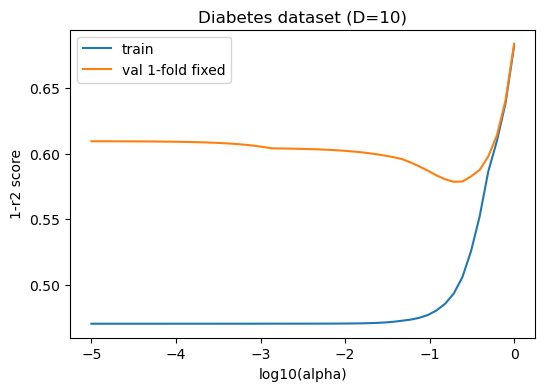

In [4]:
fig1 = plt.figure(figsize=(6,4))
ax1 = fig1.add_subplot(111)

#plt.rcParams['figure.figsize'] = [8, 5]
ax1.plot(np.log10(alphas),1-np.array(scores_train),label="train")
ax1.plot(np.log10(alphas),1-np.array(scores_val),label="val 1-fold fixed")
ax1.set_title("Diabetes dataset (D=10)")
ax1.set_xlabel("log10(alpha)")
ax1.set_ylabel("1-r2 score")
ax1.legend()
plt.show()

# Larger custom dataset

In [ ]:
#Sparse coding settings

In [9]:
np.random.seed(42)

N_train = 720
N_train_folds = 20
N_val = 720
N_test = 36
N = N_train+N_val+N_test
D = 2000
D_small = 36
mu, sigma = 0, 1.0

X = np.random.normal(mu, sigma, size=(N,D))
X_small = np.random.normal(mu, sigma, size=(N,D_small))
w_opt = np.random.normal(mu,sigma,size=D_small)
y = np.matmul(X_small,w_opt)


In [11]:
X.shape

(1476, 2000)

In [10]:
X

array([[ 0.49671415, -0.1382643 ,  0.64768854, ..., -0.88187465,
        -0.16306696, -0.74490264],
       [-0.67517827, -0.14451867, -0.79241992, ..., -0.3202978 ,
         1.64337816,  0.36064789],
       [-0.8634936 , -0.03120349,  0.01801687, ..., -1.21740379,
         0.46795042, -1.17028071],
       ...,
       [-0.56147775,  0.21577992, -0.28920955, ...,  0.5851277 ,
         0.37739584, -0.33692512],
       [ 1.2157183 ,  0.20255074, -0.41109664, ...,  0.68805401,
         1.37605969,  0.58389651],
       [ 0.02514836,  0.91110638, -0.55608432, ..., -0.61186925,
         1.43726833, -0.35858507]])

In [3]:
X[:,:D_small] = X_small
X_train = X[:N_train]
X_val = X[N_train:N_train+N_val]
X_test = X[N_train+N_val:]

y_train = y[:N_train]
y_val = y[N_train:N_train+N_val]
y_test = y[N_train+N_val:]

In [4]:
#alphas = np.logspace(-100, 2, 30)
alphas = np.logspace(-7, 1, 20)

scores_train_arr = np.zeros((N_train_folds,20))
scores_val_arr = np.zeros((N_train_folds,20))

for j in range(N_train_folds):
    print(j)
    X_train = X[j*int(N_train/N_train_folds):(j+1)*int(N_train/N_train_folds)]
    y_train = y[j*int(N_train/N_train_folds):(j+1)*int(N_train/N_train_folds)]
    #X_train = X[:int(N_train/20)]
    #y_train = y[:int(N_train/20)]
    scores_train_tmp = []
    scores_val_tmp = []
    
    for i in range(len(alphas)):
        #print(i)
        lasso = Lasso(alpha=alphas[i],random_state=0, max_iter=10000)
        lasso.fit(X_train, y_train)
        y_train_pred = np.matmul(X_train,lasso.coef_)
        y_val_pred = np.matmul(X_val,lasso.coef_)
        r2_train = lasso.score(X_train,y_train)
        r2_val = lasso.score(X_val,y_val)
        sqloss_train = np.dot(y_train_pred-y_train,y_train_pred-y_train)
        sqloss_val = np.dot(y_val_pred-y_val,y_val_pred-y_val)

        one_norm = np.matmul(np.abs(lasso.coef_),np.ones(D))
        zero_norm = np.matmul(np.where(np.abs(lasso.coef_)>0,1,0),np.ones(D))

        #scores.append(r2_val)
        #scores_train_tmp.append(r2_train)
        #scores_val_tmp.append(r2_val)
        #scores_train.append(sqloss_train)
        #scores_val.append(sqloss_val)
        
        scores_train_arr[j][i] = r2_train
        scores_val_arr[j][i] = r2_val
        
        if j==0:
            print(i)
            print(lasso.coef_)
            print(r2_val)
            print(one_norm)
            print(zero_norm)
            print(y_val_pred)
            print("\n")

    #print(r2_val)
    #print(one_norm)
    #print(zero_norm)
    print("\n")
    
    #scores_train.append(np.mean(np.array(scores_train_tmp)))
    #scores_val.append(np.mean(np.array(scores_val_tmp)))
    


0
0
[-1.46096721 -0.1607386  -1.95441609 ...  0.         -0.
 -0.        ]
0.12481272357979445
45.12570102266302
1087.0
[-6.70320330e+00 -9.43472393e+00  7.72646071e-01  9.50100891e+00
 -6.31246043e-01 -7.73858019e+00  1.91871605e+00  1.67512943e+00
  7.48633020e-01  2.43458983e+00 -2.78722348e+00 -8.78336474e+00
  8.33038010e+00 -8.27355615e+00 -8.28727101e-01 -8.19293641e-02
 -2.70842586e+00  3.67916168e-01 -2.33148675e+00 -8.68897483e-01
 -9.59142111e-01 -5.39574092e+00  4.77827853e+00 -5.59391679e+00
  8.60877988e+00  4.18773505e+00  4.79490236e+00 -1.65219181e+00
 -3.71060638e+00 -5.27774500e+00  6.18788922e-01 -9.26511133e+00
 -1.47128440e+00 -2.29940693e-01  2.21015597e+00 -1.22848515e+01
 -2.98053392e+00  1.09632959e+01 -2.48388262e+00 -6.41894313e-01
  5.93042769e-01  5.54362567e+00 -5.38554732e+00 -1.51496454e+00
 -5.85832530e+00 -1.82548563e+01  8.97731237e+00 -1.13709756e+00
 -1.56636911e+00  2.16415789e+00  6.43248423e+00  5.16287644e+00
  3.24067643e+00 -1.70672815e+00  8

7
[-1.00508629  0.03853485 -1.41106005 ... -0.          0.
 -0.        ]
0.40794868546628826
20.509070143021475
140.0
[ 1.28137214e+00 -6.80289459e+00 -2.20048357e+00  7.27474585e+00
  5.99093319e-01 -4.18131118e+00 -5.49928828e-01  6.22545192e+00
 -6.57065742e-01  5.83444621e+00 -6.38693077e+00 -3.28080455e+00
  5.39155460e+00 -6.65360893e+00  1.05198805e+00  6.39454058e-01
 -5.88940888e+00 -2.35688446e+00 -6.69644736e-01 -4.53780063e-01
  2.39920643e-01 -2.25331099e+00  2.37963554e+00 -4.03199918e+00
  2.18138078e+00  4.96963339e+00  3.38664617e+00 -4.53495325e+00
 -3.06566506e+00 -4.04311866e+00  9.85340281e-01 -4.37865745e+00
  6.20471215e-01 -6.06212939e-01  3.52761705e+00 -7.65353877e+00
 -1.65146641e+00  1.08135842e+01  9.01370140e-01 -2.85099152e+00
 -2.14908477e+00  4.46601925e+00  2.67518249e+00 -4.93739120e+00
 -4.65861341e+00 -1.28903379e+01  1.61810000e+00  2.81510175e-01
  2.69194238e+00 -6.45310658e-01  7.39349265e+00  2.13885495e+00
  4.29369237e+00 -5.79323267e-01  4.8

8
[-0.46828489  0.         -0.75655432 ... -0.         -0.
 -0.        ]
0.23043589495019556
15.312656776832776
98.0
[ 7.41082895e-01 -3.77502760e+00 -2.51740049e+00  4.32712430e+00
  2.12270822e+00 -1.00565806e+00 -1.20104517e+00  4.28436168e+00
 -9.78034112e-01  5.72832603e+00 -4.59179729e+00 -2.30207730e+00
  2.82653165e+00 -3.71528083e+00 -4.02817175e-01 -4.99191548e-02
 -4.18555843e+00 -2.84868228e+00 -1.39237558e+00 -3.94881179e-01
  2.53707335e+00 -3.00421433e+00  4.19474229e+00 -1.92056191e+00
  6.78630705e-01  3.93260706e+00  7.55983191e-01 -3.20976547e+00
 -3.54597549e+00 -6.17610847e+00  2.13390438e+00  5.33787103e-01
 -1.67665646e+00 -3.81727525e-01  3.93318755e-01 -5.49816787e+00
 -2.23465898e+00  8.04666757e+00 -2.73545337e-01 -1.01304492e+00
 -2.44500417e+00  1.18952594e+00  4.85795664e+00 -1.34741920e+00
 -4.70805227e+00 -7.91056859e+00  3.73103201e-01 -1.00188153e+00
  2.22458548e+00 -4.48806697e+00  3.93360670e+00 -5.29666675e-01
  4.13044140e+00 -3.31986516e-01  1.81

9
[-0.  0. -0. ... -0. -0. -0.]
0.002300003933355832
12.832810280807816
73.0
[ 3.96179654e+00 -4.71226305e+00 -1.83959209e+00 -7.35820612e-02
  2.92769207e-01  7.78247842e-01 -1.59144333e-01  4.15285601e-01
 -1.70064216e+00  2.24333048e+00 -2.25861452e+00  6.34492216e-01
  2.19337536e+00  1.27437122e+00 -2.58962812e+00 -1.47666483e+00
 -2.92228722e+00 -1.34555336e+00 -1.44206611e+00  2.02222332e+00
  3.23583107e+00 -4.85399310e+00  5.12643666e+00 -3.97243171e+00
 -4.26165248e-01  9.36734988e-01 -6.35947755e-01 -2.03178194e+00
 -1.10272393e+00 -5.81681996e+00  3.16752283e+00  3.21024370e+00
 -1.00486250e+00 -3.08122211e-02  1.91363059e+00 -3.72685231e+00
 -1.74855588e+00  2.19363133e+00 -7.27762763e-01 -3.66967543e-01
 -5.02398519e+00 -1.86984219e+00  3.22951933e+00  2.71914261e+00
 -3.91399819e+00 -4.97416264e+00  1.07995501e+00 -1.42109221e+00
 -1.04446897e-01 -7.76041709e+00  6.01309789e-01 -1.09357411e+00
 -7.96110691e-01  7.25413658e-01  1.06821227e+00 -1.93669469e+00
 -4.28227165e

10
[-0.  0. -0. ... -0. -0. -0.]
-0.05561590851551257
12.194425143059341
48.0
[ 5.25351153e+00 -4.47372674e+00 -1.03418319e+00 -2.49232382e+00
 -2.10827690e+00 -4.47979373e-01  1.30499049e+00 -3.10919493e+00
 -1.82447433e+00 -8.32286849e-01 -3.93293900e-01  2.03172087e+00
 -7.94453341e-01  1.10447409e+00 -9.88074146e-01 -1.21532782e+00
 -2.41943181e+00 -2.80062613e+00  1.54280358e+00  2.66151018e+00
  2.70544937e+00 -3.58331877e+00  4.27454174e+00 -3.28715537e+00
 -3.42271372e+00  1.05942240e+00 -2.30750728e+00 -1.17864730e+00
  6.09746033e-01 -1.54812977e+00  2.02660852e+00  4.08777835e+00
 -8.12111657e-01 -3.75272304e-02  5.22597095e-01 -2.11164985e+00
 -5.15494047e-01 -2.09492226e-01  1.99465939e+00  1.55958521e+00
 -2.66420933e+00 -1.61984509e+00  1.70690173e+00 -1.01032618e+00
 -2.29846144e+00 -6.71426047e+00 -2.27665738e+00 -4.03771940e+00
  1.21814376e+00 -4.37510442e+00  1.17092089e+00  1.49490890e+00
 -2.65957665e+00  1.10987533e+00  1.21312938e+00 -1.78345630e+00
 -3.60878926

12
[-0.  0. -0. ... -0. -0. -0.]
-0.07290218594106346
12.096551665145753
39.0
[ 5.27785506e+00 -4.42944281e+00 -9.39361218e-01 -2.02731016e+00
 -1.42399910e+00 -8.57749030e-01  2.02933805e+00 -3.20669064e+00
 -1.31340804e+00 -1.32163573e+00 -8.23669122e-01  1.96780656e+00
 -1.47164642e+00 -1.09434900e-01 -9.62352571e-01 -1.62522835e+00
 -2.87769720e+00 -2.89046736e+00  1.26298228e+00  2.10059767e+00
  2.60622238e+00 -3.59006052e+00  4.65668606e+00 -3.18131929e+00
 -2.44985020e+00  1.99515271e+00 -2.69184713e+00 -8.82877809e-01
  3.98114733e-01 -1.22443347e+00  2.31340232e+00  4.30280483e+00
 -8.67661602e-01  1.37136103e-01 -4.37829794e-02 -1.45987534e+00
 -3.65908557e-01 -2.46382567e-01  1.88547427e+00  2.14493496e+00
 -2.52377714e+00 -1.40519234e+00  1.29225467e+00 -2.30614341e+00
 -2.03498949e+00 -5.99840312e+00 -2.79395735e+00 -4.97129439e+00
  1.31993673e+00 -4.77771241e+00  7.58298671e-01  9.58431700e-01
 -2.36875099e+00  6.30720469e-01  4.37002424e-01 -2.36024755e+00
 -2.89233776



2


3


4


5


6


7


8


9


10


11


12


13


14


15


16


17


18


19




In [5]:
scores_val_arr

array([[ 1.24812724e-01,  1.24813378e-01,  1.24815046e-01,
         1.24819540e-01,  1.24831128e-01,  1.24859455e-01,
         1.24941584e-01,  4.07948685e-01,  2.30435895e-01,
         2.30000393e-03, -5.56159085e-02, -6.36794857e-02,
        -7.29021859e-02, -7.20305257e-02, -6.17069441e-02,
        -3.72299044e-02,  9.73220081e-03,  2.67607794e-02,
        -1.38042919e-03, -1.38042919e-03],
       [ 1.52507374e-01,  1.52507836e-01,  1.52509132e-01,
         1.52512641e-01,  1.52523120e-01,  1.52551553e-01,
         1.52631158e-01,  4.67663865e-01,  1.62067904e-01,
        -2.22811371e-01, -2.66013450e-01, -2.67462099e-01,
        -2.89266510e-01, -2.90546610e-01, -2.91179382e-01,
        -3.00067628e-01, -2.43800432e-01, -1.84939378e-01,
        -1.85565951e-01, -1.85565951e-01],
       [ 3.41162270e-01,  3.41163221e-01,  3.41165701e-01,
         3.41171821e-01,  3.41188148e-01,  3.41232674e-01,
         3.41341413e-01,  3.90914688e-01,  3.98965368e-01,
         3.01853118e-02, -1.0

In [6]:
np.mean(scores_train_arr,axis=0)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.99999999, 0.99999993,
       0.99999945, 0.99999611, 0.99997284, 0.99981187, 0.99870316,
       0.99115664, 0.94160573, 0.65496475, 0.02289014, 0.        ])

In [7]:
scores_train = np.mean(scores_train_arr,axis=0)
scores_val = np.mean(scores_val_arr,axis=0)

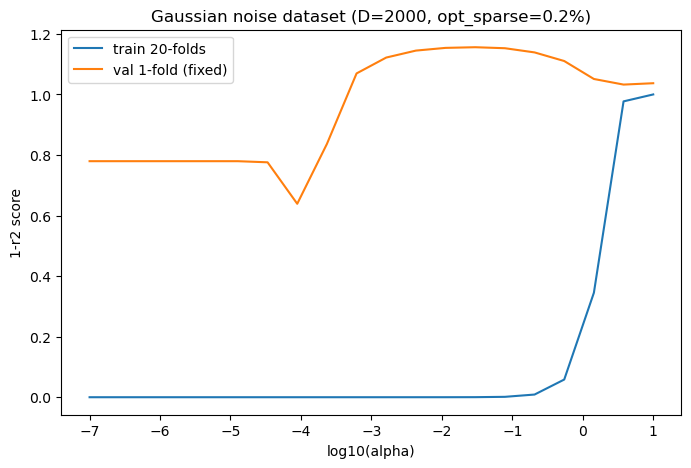

In [8]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.plot(np.log10(alphas),1-np.array(scores_train),label="train 20-folds")
plt.plot(np.log10(alphas),1-np.array(scores_val),label="val 1-fold (fixed)")
plt.title("Gaussian noise dataset (D=2000, opt_sparse=0.2%)")
plt.xlabel("log10(alpha)")
plt.ylabel("1-r2 score")
plt.legend()
plt.show()

In [ ]:
#Conventional regression settings

In [445]:
N_train = 2000
N_train_folds = 1
N_val = 2000
N_test = 36
N = N_train+N_val+N_test
D = 36
D_small = 2
mu, sigma = 0, 1.0

X = np.random.normal(mu, sigma, size=(N,D))
X_small = np.random.normal(mu, sigma, size=(N,D_small))
w_opt = np.random.normal(mu,sigma,size=D_small)
y = np.matmul(X_small,w_opt)



In [446]:
X[:,:D_small] = X_small
X_train = X[:N_train]
X_val = X[N_train:N_train+N_val]
X_test = X[N_train+N_val:]

y_train = y[:N_train]
y_val = y[N_train:N_train+N_val]
y_test = y[N_train+N_val:]


In [450]:
#alphas = np.logspace(-100, 2, 30)
alphas = np.logspace(-15, 1, 50)

scores_train_arr = np.zeros((N_train_folds,50))
scores_val_arr = np.zeros((N_train_folds,50))

for j in range(N_train_folds):
    print(j)
    X_train = X[j*int(N_train/N_train_folds):(j+1)*int(N_train/N_train_folds)]
    y_train = y[j*int(N_train/N_train_folds):(j+1)*int(N_train/N_train_folds)]
    #X_train = X[:int(N_train/20)]
    #y_train = y[:int(N_train/20)]
    scores_train_tmp = []
    scores_val_tmp = []
    
    for i in range(len(alphas)):
        #print(i)
        lasso = Lasso(alpha=alphas[i],random_state=0, max_iter=10000)
        lasso.fit(X_train, y_train)
        y_train_pred = np.matmul(X_train,lasso.coef_)
        y_val_pred = np.matmul(X_val,lasso.coef_)
        r2_train = lasso.score(X_train,y_train)
        r2_val = lasso.score(X_val,y_val)
        sqloss_train = np.dot(y_train_pred-y_train,y_train_pred-y_train)
        sqloss_val = np.dot(y_val_pred-y_val,y_val_pred-y_val)

        one_norm = np.matmul(np.abs(lasso.coef_),np.ones(D))
        zero_norm = np.matmul(np.where(np.abs(lasso.coef_)>0,1,0),np.ones(D))

        #scores.append(r2_val)
        #scores_train_tmp.append(r2_train)
        #scores_val_tmp.append(r2_val)
        #scores_train.append(sqloss_train)
        #scores_val.append(sqloss_val)
        
        scores_train_arr[j][i] = r2_train
        scores_val_arr[j][i] = r2_val
        
        if j==0:
            print(i)
            print(lasso.coef_)
            print(r2_val)
            print(one_norm)
            print(zero_norm)
            print(y_val_pred)
            print("\n")

    #print(r2_val)
    #print(one_norm)
    #print(zero_norm)
    print("\n")
    
    #scores_train.append(np.mean(np.array(scores_train_tmp)))
    #scores_val.append(np.mean(np.array(scores_val_tmp)))
    



0
0
[-1.24343153e+00  6.87998579e-01 -2.01344586e-07 -9.27485220e-07
 -2.96474068e-07 -3.52476110e-07 -4.23567559e-07 -1.53961919e-07
  6.30564097e-07 -2.53395872e-07 -2.62905959e-07 -7.28668016e-08
 -1.92946698e-07  1.10302871e-07  2.45614300e-07 -9.67280871e-08
 -5.74944635e-08 -1.09346749e-07  2.42070345e-07  2.46387443e-09
  1.60351367e-07  9.51756743e-08  1.12984265e-07  4.03773167e-08
 -1.04493540e-07 -7.11029482e-08  1.24350929e-07  1.10770635e-08
 -7.46754245e-08 -1.60165470e-08  2.31900566e-08 -7.38602289e-08
  1.36098903e-08 -6.33823787e-08 -6.34594554e-08 -1.86499407e-08]
0.9999999999988208
1.9314358109215042
36.0
[ 1.75861186  0.9909783  -1.19761922 ... -0.998657   -0.03340577
  0.25773389]


1
[-1.24343153e+00  6.87998579e-01 -2.01344584e-07 -9.27485218e-07
 -2.96474067e-07 -3.52476109e-07 -4.23567558e-07 -1.53961918e-07
  6.30564096e-07 -2.53395871e-07 -2.62905958e-07 -7.28668003e-08
 -1.92946697e-07  1.10302870e-07  2.45614299e-07 -9.67280860e-08
 -5.74944621e-08 -1.0934

In [451]:
scores_train = np.mean(scores_train_arr,axis=0)
scores_val = np.mean(scores_val_arr,axis=0)

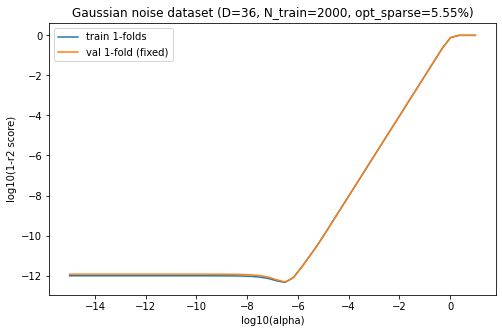

In [453]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.plot(np.log10(alphas),np.log10(1-np.array(scores_train)),label="train 1-folds")
plt.plot(np.log10(alphas),np.log10(1-np.array(scores_val)),label="val 1-fold (fixed)")
plt.title("Gaussian noise dataset (D=36, N_train=2000, opt_sparse=5.55%)")
plt.xlabel("log10(alpha)")
plt.ylabel("log10(1-r2 score)")
plt.legend()
plt.show()

In [18]:
from qubovert import boolean_var

N = 10

# create the variables
x = {i: boolean_var('x(%d)' % i) for i in range(N)}

# minimize \sum_{i=0}^{N-2} (1-2x_{i}) x_{i+1}
model = 0
for i in range(N-1):
    model += (1 - 2 * x[i]) * x[i+1]

In [19]:
x

{0: {('x(0)',): 1},
 1: {('x(1)',): 1},
 2: {('x(2)',): 1},
 3: {('x(3)',): 1},
 4: {('x(4)',): 1},
 5: {('x(5)',): 1},
 6: {('x(6)',): 1},
 7: {('x(7)',): 1},
 8: {('x(8)',): 1},
 9: {('x(9)',): 1}}

In [20]:
x[0][('x(0)',)]

1

In [21]:
type(list(x[0].keys())[0][0])

str

In [22]:
model

{('x(0)', 'x(1)'): -2,
 ('x(1)',): 1,
 ('x(1)', 'x(2)'): -2,
 ('x(2)',): 1,
 ('x(2)', 'x(3)'): -2,
 ('x(3)',): 1,
 ('x(3)', 'x(4)'): -2,
 ('x(4)',): 1,
 ('x(4)', 'x(5)'): -2,
 ('x(5)',): 1,
 ('x(5)', 'x(6)'): -2,
 ('x(6)',): 1,
 ('x(6)', 'x(7)'): -2,
 ('x(7)',): 1,
 ('x(7)', 'x(8)'): -2,
 ('x(8)',): 1,
 ('x(8)', 'x(9)'): -2,
 ('x(9)',): 1}

In [23]:
N=100
x = {i: boolean_var('x(%d)' % i) for i in range(N)}

In [24]:
A = -np.ones((N,N))
b = np.zeros(N)

In [26]:
A[0][0] = 200

In [27]:

model = 0
for i in range(N):
    #print(i)
    for j in range(N):
        model += x[i]*A[i][j]*x[j]
    model += b[i]*x[i]
    
#print(model)

In [29]:
model_solution = model.solve_bruteforce()
print("Variable assignment:", model_solution)
print("Model value:", model.value(model_solution))
print("Constraints satisfied?", model.is_solution_valid(model_solution))

KeyboardInterrupt: 

In [30]:
from qubovert.sim import anneal_qubo

time_start = time.time()
res = anneal_qubo(model, num_anneals=10)
print("Anneal time taken %f"%(time.time()-time_start))
model_solution = res.best.state

print("Variable assignment:", model_solution)
print("Model value:", res.best.value)
print("Constraints satisfied?", model.is_solution_valid(model_solution))

Anneal time taken 0.184067
Variable assignment: {'x(0)': 0, 'x(1)': 1, 'x(2)': 1, 'x(3)': 1, 'x(4)': 1, 'x(5)': 1, 'x(6)': 1, 'x(7)': 1, 'x(8)': 1, 'x(9)': 1, 'x(10)': 1, 'x(11)': 1, 'x(12)': 1, 'x(13)': 1, 'x(14)': 1, 'x(15)': 1, 'x(16)': 1, 'x(17)': 1, 'x(18)': 1, 'x(19)': 1, 'x(20)': 1, 'x(21)': 1, 'x(22)': 1, 'x(23)': 1, 'x(24)': 1, 'x(25)': 1, 'x(26)': 1, 'x(27)': 1, 'x(28)': 1, 'x(29)': 1, 'x(30)': 1, 'x(31)': 1, 'x(32)': 1, 'x(33)': 1, 'x(34)': 1, 'x(35)': 1, 'x(36)': 1, 'x(37)': 1, 'x(38)': 1, 'x(39)': 1, 'x(40)': 1, 'x(41)': 1, 'x(42)': 1, 'x(43)': 1, 'x(44)': 1, 'x(45)': 1, 'x(46)': 1, 'x(47)': 1, 'x(48)': 1, 'x(49)': 1, 'x(50)': 1, 'x(51)': 1, 'x(52)': 1, 'x(53)': 1, 'x(54)': 1, 'x(55)': 1, 'x(56)': 1, 'x(57)': 1, 'x(58)': 1, 'x(59)': 1, 'x(60)': 1, 'x(61)': 1, 'x(62)': 1, 'x(63)': 1, 'x(64)': 1, 'x(65)': 1, 'x(66)': 1, 'x(67)': 1, 'x(68)': 1, 'x(69)': 1, 'x(70)': 1, 'x(71)': 1, 'x(72)': 1, 'x(73)': 1, 'x(74)': 1, 'x(75)': 1, 'x(76)': 1, 'x(77)': 1, 'x(78)': 1, 'x(79)': 1, '

In [35]:
np.array(list(model_solution.values()))

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
list(model_solution.values()).count(1)

99

# Custom algorithm

In [10]:
from qubovert.sim import anneal_qubo
from qubovert import boolean_var


X_all, y_all = datasets.load_diabetes(return_X_y=True)
print(X_all.shape)


X = X_all[:150]
y = y_all[:150]
N = X.shape[0]
D = X.shape[1]

print(X)
print(y)

X_val = X_all[150:200]
y_val = y_all[150:200]

X_mean = np.mean(X,axis=0)
X_std = np.std(X,axis=0)
y_mean = np.mean(y)
y_std = np.std(y)

X = (X-X_mean)/X_std
y = (y-y_mean)/y_std


(442, 10)
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [-0.05637009 -0.04464164  0.09295276 ...  0.02545259  0.02606052
   0.04034337]
 [-0.06000263  0.05068012  0.01535029 ... -0.00259226 -0.03074792
  -0.0010777 ]
 [-0.04910502  0.05068012 -0.00512814 ...  0.07120998  0.06123763
  -0.03835666]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
 

In [11]:
alpha = 10.0
gamma=0.02

m_prev = np.ones(D)
m = np.ones(D)
print(m)
w_prev = np.zeros(D)
w = np.linalg.multi_dot([np.diag(m),X.T,X,np.diag(m)])
w = np.linalg.multi_dot([np.linalg.inv(w),np.diag(m),X.T,y])
print(w)

t = 1
step_change = np.linalg.norm(m*w-m_prev*w_prev)
while step_change > 0.001:
    print(t)
    A = np.linalg.multi_dot([np.diag(w),X.T,X,np.diag(w)])
    b = -2*np.linalg.multi_dot([np.diag(w),X.T,y])
    b = b + alpha*w*np.sign(w)
    
    #print(A)
    #print(b)
    
    m_prev = m.copy()
    m = {i: boolean_var('m(%d)' % i) for i in range(D)}
    model = 0
    for i in range(D):
        for j in range(D):
            model += m[i]*(A[i][j]+1e-9)*m[j]
        model += (b[i]+1e-9)*m[i]
        
    time_start = time.time()
    res = anneal_qubo(model, num_anneals=10)
    print("Anneal time taken %f"%(time.time()-time_start))
    model_solution = res.best.state
    print("Model value:", res.best.value)
    print("Model value + yT.y:", res.best.value+np.dot(y,y))
        
    m = np.array(list(model_solution.values()))
    print(m_prev)
    print(m)
    
    w_prev = w.copy()
    w = np.linalg.multi_dot([np.diag(m),X.T,X,np.diag(m)])
    w = np.linalg.multi_dot([np.linalg.inv(w+np.eye(D)*1e-9),np.diag(m),X.T,y])
    #w = (1-gamma)*w_prev + gamma*m*w + gamma*(1-gamma)*(1-m)*w
    w = (1-gamma)*w_prev + gamma*m*w
    print(w_prev)
    print(w)
    
    step_change = np.linalg.norm(m*w-m_prev*w_prev)
    t += 1
    print(step_change)
    print('\n')
    

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[-0.04366155 -0.23265029  0.2730981   0.19530638  0.05115039 -0.2229696
 -0.17362928  0.07755063  0.34455797  0.05895367]
1
Anneal time taken 0.004099
Model value: -63.73173009546194
Model value + yT.y: 86.26826990453806
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0 1 1 1 0 0 1 0 1 0]
[-0.04366155 -0.23265029  0.2730981   0.19530638  0.05115039 -0.2229696
 -0.17362928  0.07755063  0.34455797  0.05895367]
[-0.04278832 -0.23330001  0.27257812  0.1951092   0.05012738 -0.21851021
 -0.17432421  0.07599962  0.34522792  0.0577746 ]
0.2524468967499726


2
Anneal time taken 0.003708
Model value: -63.73309340419097
Model value + yT.y: 86.26690659580903
[0 1 1 1 0 0 1 0 1 0]
[0 1 1 1 0 0 1 0 1 0]
[-0.04278832 -0.23330001  0.27257812  0.1951092   0.05012738 -0.21851021
 -0.17432421  0.07599962  0.34522792  0.0577746 ]
[-0.04193255 -0.23393672  0.27206853  0.19491596  0.04912484 -0.21414001
 -0.17500525  0.07447963  0.34588447  0.05661911]
0.0012638416678815594


3
Anneal time 

# Alternative method with qubovert

In [50]:
from qubovert import QUBO

In [51]:
N=2000

In [52]:
A = np.ones((N,N))
b = np.ones(N)

In [53]:
A_dict = {}

In [54]:
for i in range(N):
    for j in range(N):
        A_dict[('x(%d)'%(i),'x(%d)'%(j))] = A[i][j]

In [55]:
len(A_dict)

4000000

In [56]:
qubo = QUBO(A_dict)

In [57]:
qubo

{('x(0)',): 1.0,
 ('x(0)', 'x(1)'): 2.0,
 ('x(0)', 'x(2)'): 2.0,
 ('x(0)', 'x(3)'): 2.0,
 ('x(0)', 'x(4)'): 2.0,
 ('x(0)', 'x(5)'): 2.0,
 ('x(0)', 'x(6)'): 2.0,
 ('x(0)', 'x(7)'): 2.0,
 ('x(0)', 'x(8)'): 2.0,
 ('x(0)', 'x(9)'): 2.0,
 ('x(0)', 'x(10)'): 2.0,
 ('x(0)', 'x(11)'): 2.0,
 ('x(0)', 'x(12)'): 2.0,
 ('x(0)', 'x(13)'): 2.0,
 ('x(0)', 'x(14)'): 2.0,
 ('x(0)', 'x(15)'): 2.0,
 ('x(0)', 'x(16)'): 2.0,
 ('x(0)', 'x(17)'): 2.0,
 ('x(0)', 'x(18)'): 2.0,
 ('x(0)', 'x(19)'): 2.0,
 ('x(0)', 'x(20)'): 2.0,
 ('x(0)', 'x(21)'): 2.0,
 ('x(0)', 'x(22)'): 2.0,
 ('x(0)', 'x(23)'): 2.0,
 ('x(0)', 'x(24)'): 2.0,
 ('x(0)', 'x(25)'): 2.0,
 ('x(0)', 'x(26)'): 2.0,
 ('x(0)', 'x(27)'): 2.0,
 ('x(0)', 'x(28)'): 2.0,
 ('x(0)', 'x(29)'): 2.0,
 ('x(0)', 'x(30)'): 2.0,
 ('x(0)', 'x(31)'): 2.0,
 ('x(0)', 'x(32)'): 2.0,
 ('x(0)', 'x(33)'): 2.0,
 ('x(0)', 'x(34)'): 2.0,
 ('x(0)', 'x(35)'): 2.0,
 ('x(0)', 'x(36)'): 2.0,
 ('x(0)', 'x(37)'): 2.0,
 ('x(0)', 'x(38)'): 2.0,
 ('x(0)', 'x(39)'): 2.0,
 ('x(0)', 'x(40)'

In [58]:
Q = qubo.to_qubo()

In [59]:
Q

{(0,): 1.0,
 (0, 1): 2.0,
 (0, 2): 2.0,
 (0, 3): 2.0,
 (0, 4): 2.0,
 (0, 5): 2.0,
 (0, 6): 2.0,
 (0, 7): 2.0,
 (0, 8): 2.0,
 (0, 9): 2.0,
 (0, 10): 2.0,
 (0, 11): 2.0,
 (0, 12): 2.0,
 (0, 13): 2.0,
 (0, 14): 2.0,
 (0, 15): 2.0,
 (0, 16): 2.0,
 (0, 17): 2.0,
 (0, 18): 2.0,
 (0, 19): 2.0,
 (0, 20): 2.0,
 (0, 21): 2.0,
 (0, 22): 2.0,
 (0, 23): 2.0,
 (0, 24): 2.0,
 (0, 25): 2.0,
 (0, 26): 2.0,
 (0, 27): 2.0,
 (0, 28): 2.0,
 (0, 29): 2.0,
 (0, 30): 2.0,
 (0, 31): 2.0,
 (0, 32): 2.0,
 (0, 33): 2.0,
 (0, 34): 2.0,
 (0, 35): 2.0,
 (0, 36): 2.0,
 (0, 37): 2.0,
 (0, 38): 2.0,
 (0, 39): 2.0,
 (0, 40): 2.0,
 (0, 41): 2.0,
 (0, 42): 2.0,
 (0, 43): 2.0,
 (0, 44): 2.0,
 (0, 45): 2.0,
 (0, 46): 2.0,
 (0, 47): 2.0,
 (0, 48): 2.0,
 (0, 49): 2.0,
 (0, 50): 2.0,
 (0, 51): 2.0,
 (0, 52): 2.0,
 (0, 53): 2.0,
 (0, 54): 2.0,
 (0, 55): 2.0,
 (0, 56): 2.0,
 (0, 57): 2.0,
 (0, 58): 2.0,
 (0, 59): 2.0,
 (0, 60): 2.0,
 (0, 61): 2.0,
 (0, 62): 2.0,
 (0, 63): 2.0,
 (0, 64): 2.0,
 (0, 65): 2.0,
 (0, 66): 2.0,
 (0, 67

In [60]:
type(Q)

qubovert.utils._qubomatrix.QUBOMatrix

In [61]:
from qubovert.sim import anneal_qubo

res = anneal_qubo(Q, num_anneals=1)
model_solution = res.best.state

print("Variable assignment:", model_solution)
print("Model value:", res.best.value)
print("Constraints satisfied?", model.is_solution_valid(model_solution))

Variable assignment: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 

# Misc

In [4]:


X, y = datasets.load_diabetes(return_X_y=True)
X = X[:150]
y = y[:150]

lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{"alpha": alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

(0.0001, 0.31622776601683794)

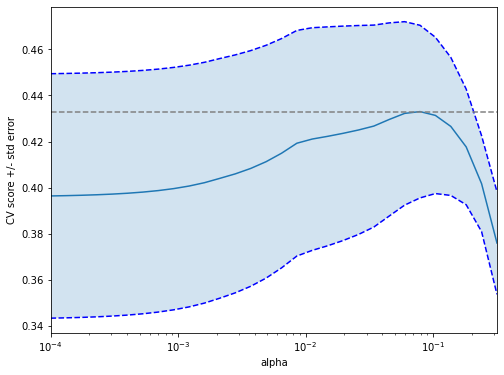

In [5]:
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("CV score +/- std error")
plt.xlabel("alpha")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xlim([alphas[0], alphas[-1]])

In [8]:
scores

array([0.39638051, 0.39650624, 0.39667201, 0.39689044, 0.39717807,
       0.39755659, 0.39805404, 0.39870708, 0.3995624 , 0.40067986,
       0.40213502, 0.40402065, 0.40596304, 0.40831427, 0.41123993,
       0.41489967, 0.41926122, 0.42107802, 0.42225458, 0.42355432,
       0.42500251, 0.42670708, 0.42957468, 0.43220641, 0.43298992,
       0.43133725, 0.42655766, 0.41766182, 0.4017079 , 0.3759415 ])

In [9]:
alphas

array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])